In [1]:
# importing libraires
import sklearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading titanic data
titanic_df = pd.read_csv('datasets/titanic-train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# getting shape
titanic_df.shape

(891, 12)

In [4]:
# dropping irrelevant columns from dataset
titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], 'columns', inplace=True)
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [5]:
# getting shape
titanic_df.shape

(891, 8)

In [6]:
# dropping missing values records
titanic_df = titanic_df.dropna()

In [7]:
# getting shape
titanic_df.shape

(712, 8)

In [8]:
# statistical information of dataset
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


Text(0, 0.5, 'Survived')

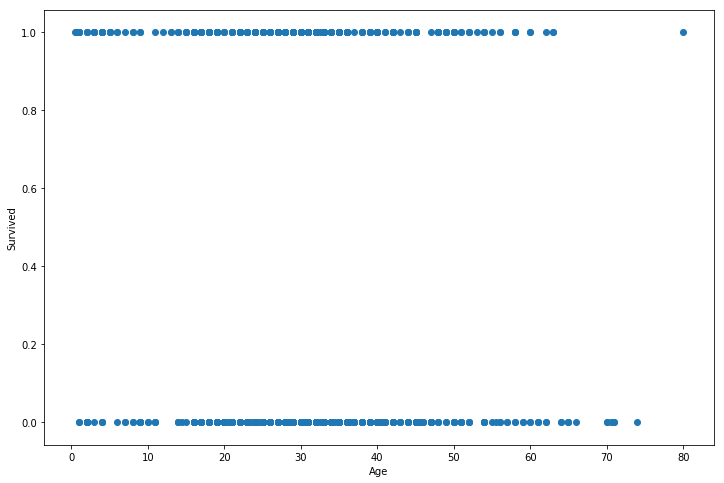

In [9]:
# visualizing the data
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(titanic_df['Age'], titanic_df['Survived'])
plt.xlabel('Age')
plt.ylabel('Survived')

Text(0, 0.5, 'Survived')

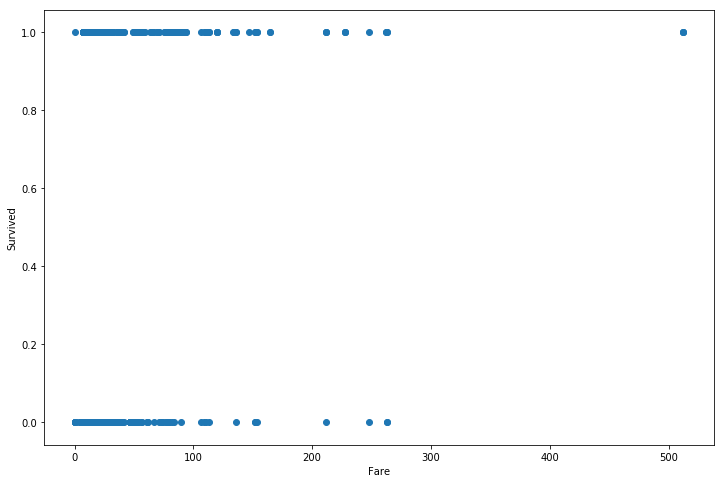

In [10]:
# visualizing the data
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(titanic_df['Fare'], titanic_df['Survived'])
plt.xlabel('Fare')
plt.ylabel('Survived')

Text(0, 0.5, 'Survived')

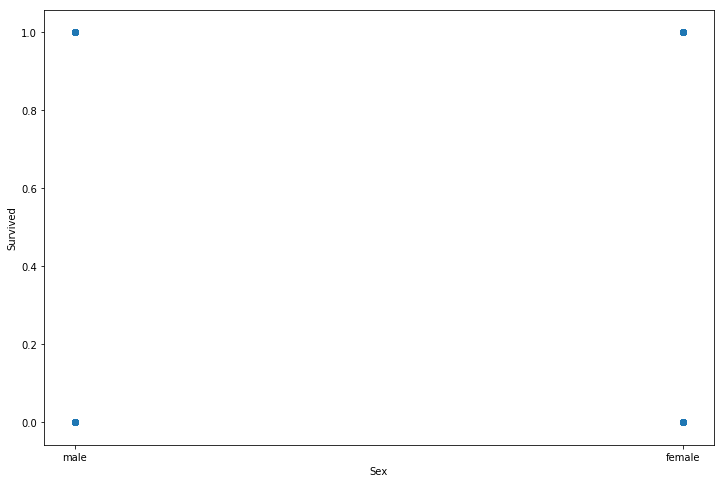

In [11]:
# visualizing the data
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(titanic_df['Sex'], titanic_df['Survived'])
plt.xlabel('Sex')
plt.ylabel('Survived')

In [12]:
# using crosstab to get numberical details
pd.crosstab(titanic_df['Sex'], titanic_df['Survived'])

Survived,0,1
Sex,,
female,64,195
male,360,93


In [13]:
# using crosstab to get numberical details
pd.crosstab(titanic_df['Pclass'], titanic_df['Survived'])

Survived,0,1
Pclass,,
1,64,120
2,90,83
3,270,85


In [14]:
# finding interrelation between the features itself (-1 to 1)
titanic_data_corr = titanic_df.corr()
titanic_data_corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.356462,-0.082446,-0.015523,0.095265,0.266100
Pclass,-0.356462,1.000000,-0.365902,0.065187,0.023666,-0.552893
Age,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143
SibSp,-0.015523,0.065187,-0.307351,1.000000,0.383338,0.139860
Parch,0.095265,0.023666,-0.187896,0.383338,1.000000,0.206624
Fare,0.266100,-0.552893,0.093143,0.139860,0.206624,1.000000


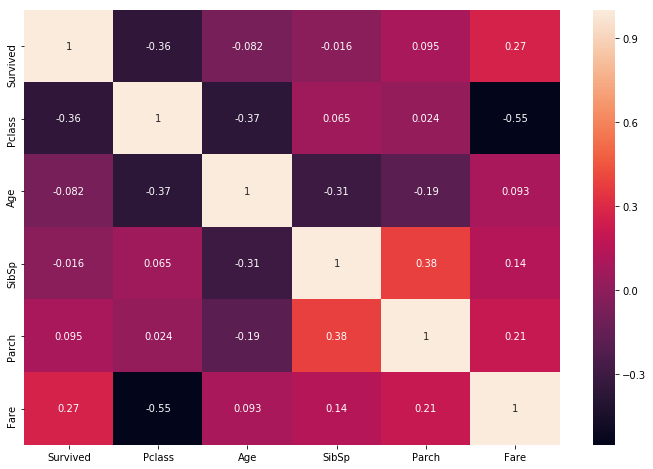

In [15]:
# using heatmap for better visualization
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(titanic_data_corr, annot=True)

In [16]:
# viewing dataset
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [17]:
# labeling categorical data column here sex
from sklearn.preprocessing import LabelEncoder
label_encoding = LabelEncoder()
titanic_df['Sex'] = label_encoding.fit_transform(titanic_df['Sex'].astype(str))
titanic_df.head()
# sex column data converted to binary 0-female 1-male

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [18]:
# label of classes
label_encoding.classes_

array(['female', 'male'], dtype=object)

In [19]:
# one hot encoding for Embarked columns
titanic_df = pd.get_dummies(titanic_df, columns=['Embarked'])
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [20]:
# resetting the index of data
titanic_df = titanic_df.sample(frac=1).reset_index(drop=True)
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,1,1,37.0,1,0,53.1000,0,0,1
1,1,2,0,21.0,0,0,10.5000,0,0,1
2,0,2,1,25.0,0,0,13.0000,0,0,1
3,1,1,1,48.0,0,0,26.5500,0,0,1
4,1,1,0,32.0,0,0,76.2917,1,0,0


In [21]:
# getting shape
titanic_df.shape

(712, 10)

In [22]:
# spliting train and test data
from sklearn.model_selection import train_test_split
X = titanic_df.drop('Survived', axis=1)
Y = titanic_df['Survived']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [23]:
# getting shape
x_train.shape, y_train.shape

((569, 9), (569,))

In [24]:
# training and fitting data
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
logistic_model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
# predicting y
y_pred = logistic_model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [37]:
# comparing prediction
pred_results = pd.DataFrame({'Expected':y_test, 'Actual':y_pred})
pred_results.sample(5)

,Expected,Actual
255,0,0
628,1,1
440,0,0
312,0,0
557,1,1


In [39]:
# measuring model using crosstab
titanic_crosstab = pd.crosstab(pred_results.Actual, pred_results.Expected)
titanic_crosstab

Expected,0,1
Actual,,
0,71,14
1,18,40


In [40]:
# measuring meterics for model
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print('Accuracy Score :', accuracy_score(y_test, y_pred))
print('Precison Score :', precision_score(y_test, y_pred))
print('Recall Score :', recall_score(y_test, y_pred))

Accuracy Score : 0.7762237762237763
Precison Score : 0.6896551724137931
Recall Score : 0.7407407407407407


In [41]:
# measuring by own
titanic_crosstab

Expected,0,1
Actual,,
0,71,14
1,18,40


In [43]:
# storing TP, TN, FP, FN 
TP = titanic_crosstab[1][1]
TN = titanic_crosstab[0][0]
FP = titanic_crosstab[0][1]
FN = titanic_crosstab[1][0]

In [44]:
# finding accuracy score
accuracy_score_ver = (TP + TN) / (TP + TN + FP + FN)
accuracy_score_ver

0.7762237762237763

In [46]:
# finding precision score
precision_score_ver = (TP) / (TP + FP)
precision_score_ver

0.6896551724137931

In [47]:
# finding recall score
recall_score_ver = (TP) / (TP + FN)
recall_score_ver

0.7407407407407407

In [48]:
print('Accuracy Score :', accuracy_score(y_test, y_pred))
print('Precison Score :', precision_score(y_test, y_pred))
print('Recall Score :', recall_score(y_test, y_pred))

Accuracy Score : 0.7762237762237763
Precison Score : 0.6896551724137931
Recall Score : 0.7407407407407407


In [50]:
# saving processed data
titanic_df.to_csv('datasets/titanic-processed.csv', index=False)